<a href="https://colab.research.google.com/github/mohammadhossein-kr/AI-vs.-AI/blob/main/AI%20vs.%20AI%20-%20Carbon%20Dioxide%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Load Packages
import pandas as pd
import numpy as np

In [32]:
#Load dataset
dataset_url ="https://raw.githubusercontent.com/mohammadhossein-kr/AI-vs.-AI/main/CO2%20Reports/Reports.csv?token=GHSAT0AAAAAABSBTKP7WZBPZWZGJQCCZDKMYQ6GVSQ"
dataset = pd.read_csv(dataset_url)
dataset.describe()

,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Carbon Dioxide (ppm)
count,702.00000,702.000000,702.000000,702.000000
mean,352.29896,352.293433,352.294131,352.298333
std,26.11203,26.178823,26.110205,26.180379
min,314.42000,312.480000,314.890000,313.210000
25%,328.98000,328.542500,329.160000,328.552500
50%,349.74000,349.875000,349.825000,349.675000
75%,372.80000,373.225000,372.857500,373.060000
max,406.04000,407.280000,405.830000,407.650000


In [ ]:
#Pandas dataframe to numpy array
data = dataset.values
print(data.shape)

(702, 4)


In [ ]:
#Normalization
def Normalize(data):
  norm = data.copy()
  for col in range(data.shape[1]):
    norm[:,col] = (np.max(norm[:,col])- norm[:,col])/(np.max(norm[:,col])-np.min(norm[:,col]))
  return norm
data_norm = Normalize(data)

In [ ]:
#Seperate Input and Output
from sklearn.model_selection import train_test_split
X = data_norm[:,0:-1]
y = data_norm[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 31)
print(X_train.shape , y_train.shape)

(561, 3) (561,)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 60)                240       
                                                                 
 dense_11 (Dense)            (None, 100)               6100      
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 60)                6060      
                                                                 
 dense_14 (Dense)            (None, 1)                 61        
                                                                 
Total params: 22,561
Trainable params: 22,561
Non-trainable

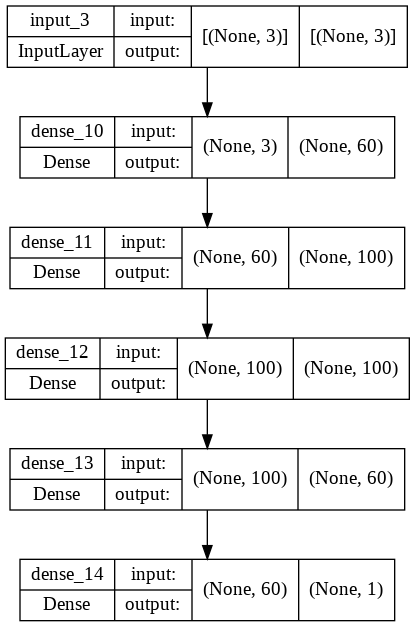

In [ ]:
#Model implemnation
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D, Dense
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2DTranspose
input_layer = Input(shape=(3,))
l1 = Dense(units=60,activation = "relu")(input_layer)
l2 = Dense(units=100,activation = "relu")(l1)
l3 = Dense(units=100,activation = "relu")(l2)
l4 = Dense(units=60,activation ="relu")(l3)
output = Dense(units=1,activation = "sigmoid")(l4)
model = Model(input_layer,output)
model.summary()
plot_model(model,show_shapes=True)

In [ ]:
#Compile Model
model.compile(optimizer=Adam(),loss="MSE")

model.fit(x=X_train,y=y_train,epochs=150,steps_per_epoch=10,validation_data=[X_test,y_test],validation_steps=10)

Epoch 1/150
10/10 [==============================] - 1s 17ms/step - loss: 0.0797 - val_loss: 0.0699
Epoch 2/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0594 - val_loss: 0.0484
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0447 - val_loss: 0.0344
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.0198
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 0.0070
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 7/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 9/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11

In [ ]:
#Test the model
pred = model.predict(X_test)
print("input:",X_test[0,0],X_test[0,1],"Output:",y_test[0], "pred:",pred[0])

input: 0.7854180309975991 0.7857594936708859 Output: 0.793096145700974 pred: [0.7844702]


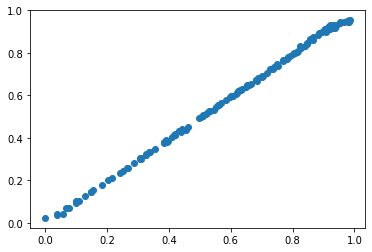

In [ ]:
#Visulize the results
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=pred)
plt.show()

In [ ]:
pred = model.predict(X_test)
print("accuracy is:",np.mean(np.argmax(pred[1])==np.argmax(y_test[1])))
print("accuracy is:",(pred[1]/y_test[1])*100)

accuracy is: 1.0
accuracy is: [98.43931]
